In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi

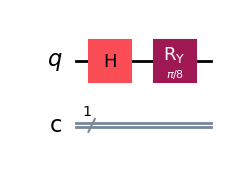

In [2]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.ry(pi/8,0)

qc.draw("mpl")

In [3]:
sim = AerSimulator()
# job = sim.run(qc,shots = 1024)
# count = job.result().get_counts()

In [4]:
# plot_histogram(count)

### Statevector simulator

In [5]:
def get_psi(circuit,show_bloch,title = "Quantum Circuit"):
    if show_bloch:
        psi = Statevector.from_instruction(circuit)
        print(f"{title}")
        display(circuit.draw('mpl'))
        display(plot_bloch_multivector(psi))
        return psi

Quantum Circuit


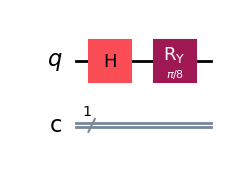

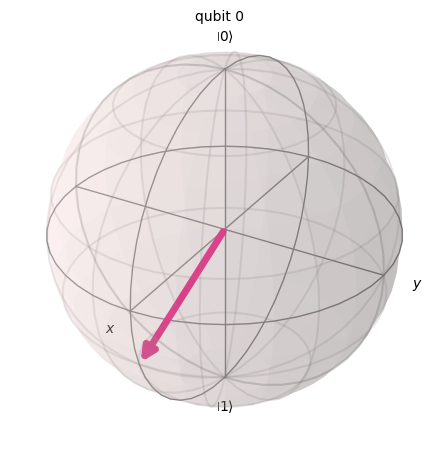

Statevector([0.55557023+0.j, 0.83146961+0.j],
            dims=(2,))


In [6]:
get_psi(qc,True)

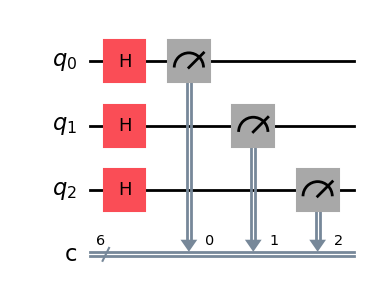

In [7]:
q_ct1 = QuantumCircuit(3,6)
q_ct1.h([0,1,2])
q_ct1.measure([0,1,2],[0,1,2])
q_ct1.draw("mpl")

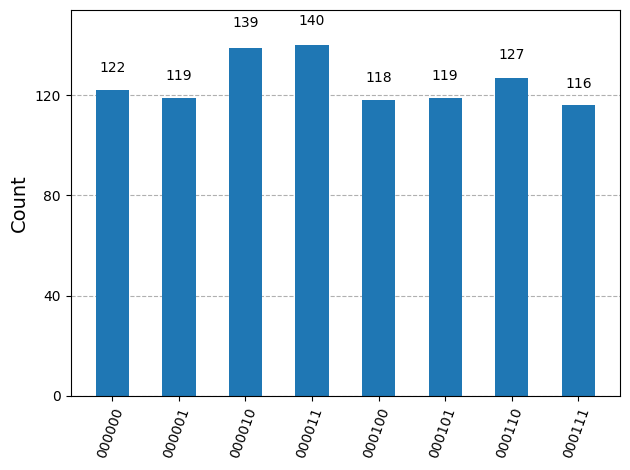

In [8]:
count = sim.run(q_ct1,shots=1000).result().get_counts(q_ct1)
plot_histogram(count)

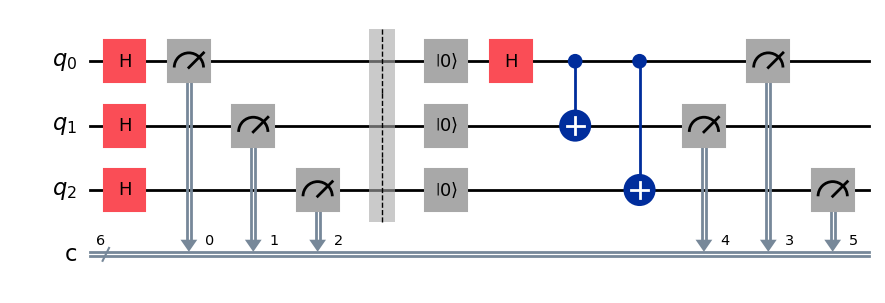

In [9]:
q_ct1.barrier([0,1,2])
q_ct1.reset([0,1,2])
q_ct1.h(0)
q_ct1.cx(0,1)
q_ct1.cx(0,2)
q_ct1.measure([0,1,2],[3,4,5])
q_ct1.draw('mpl')

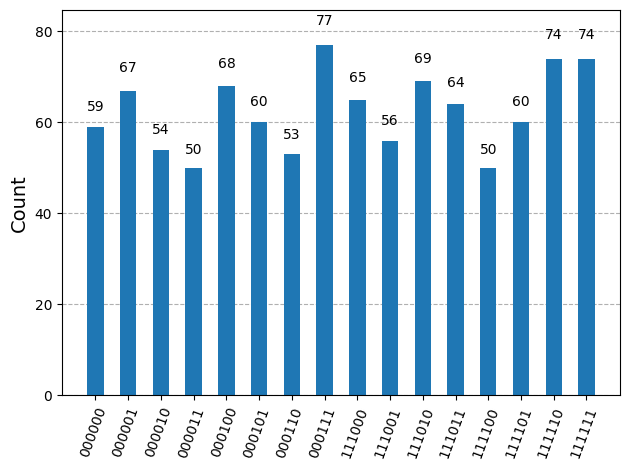

In [10]:
count = sim.run(q_ct1,shots=1000).result().get_counts(q_ct1)
plot_histogram(count)

[0.92387953+0.j 0.38268343+0.j]


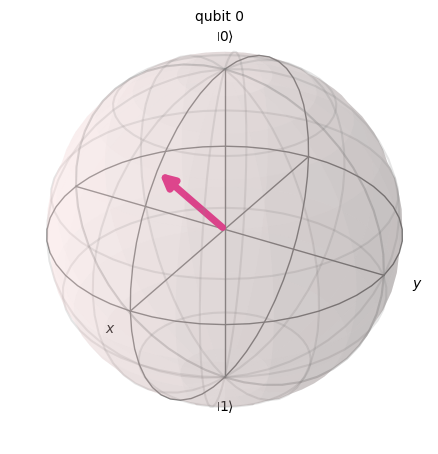

In [11]:
q_ct2 = QuantumCircuit(1)
q_ct2.ry(pi/4,0)

psi = Statevector.from_instruction(q_ct2)

print(psi.data)
q_ct2.draw('mpl')
plot_bloch_multivector(psi)


